### A/B Test Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
from datetime import datetime

In [23]:
data=pd.read_csv("/home/sakshi/Documents/Assignments.csv")

In [24]:

data.head()

,userid,ts,groupid
0,c5d77c89-33a3-4fe3-9e31-179dec09d49c,2021-11-02T07:31:42Z,0
1,9061d751-7a94-44d3-8792-5ca5ec59aa89,2021-11-13T07:43:51Z,0
2,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-11-20T19:26:07Z,0
3,d2646662-269f-49de-aab1-8776afced9a3,2021-11-20T11:09:02Z,0
4,2d9b23b7-4e5e-4162-9f0f-49e593fdd2b5,2021-11-04T07:42:07Z,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   userid   60000 non-null  object
 1   ts       60000 non-null  object
 2   groupid  60000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [7]:
data.describe()

,groupid
count,60000.000000
mean,0.500817
std,0.500003
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
data.shape

(60000, 3)

In [12]:
data.head(1).ts[0]


'2021-11-02T07:31:42Z'

In [15]:
#Changing dt column into datetime format
datetime.strptime(data.head(1).ts[0],'%Y-%m-%dT%H:%M:%SZ').strftime("%Y-%m-%d")

'2021-11-02'

In [26]:
data['dt']=data['ts'].map(lambda x:datetime.strptime(x,'%Y-%m-%dT%H:%M:%SZ').strftime("%Y-%m-%d"))

In [27]:
data.head()

,userid,ts,groupid,dt
0,c5d77c89-33a3-4fe3-9e31-179dec09d49c,2021-11-02T07:31:42Z,0,2021-11-02
1,9061d751-7a94-44d3-8792-5ca5ec59aa89,2021-11-13T07:43:51Z,0,2021-11-13
2,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-11-20T19:26:07Z,0,2021-11-20
3,d2646662-269f-49de-aab1-8776afced9a3,2021-11-20T11:09:02Z,0,2021-11-20
4,2d9b23b7-4e5e-4162-9f0f-49e593fdd2b5,2021-11-04T07:42:07Z,0,2021-11-04


In [28]:
#0-control group
#1-test group

data['groupid'].value_counts()

1    30049
0    29951
Name: groupid, dtype: int64

In [44]:
data.groupby(['groupid']).count()

,userid,ts,dt
groupid,,,
0,29951,29951,29951
1,30049,30049,30049


In [55]:
data_count=data.groupby(['groupid','dt']).count().reset_index()

In [46]:
data_count

,groupid,dt,userid,ts
0,0,2021-11-01,1497,1497
1,0,2021-11-02,1467,1467
2,0,2021-11-03,1532,1532
3,0,2021-11-04,1509,1509
4,0,2021-11-05,1503,1503


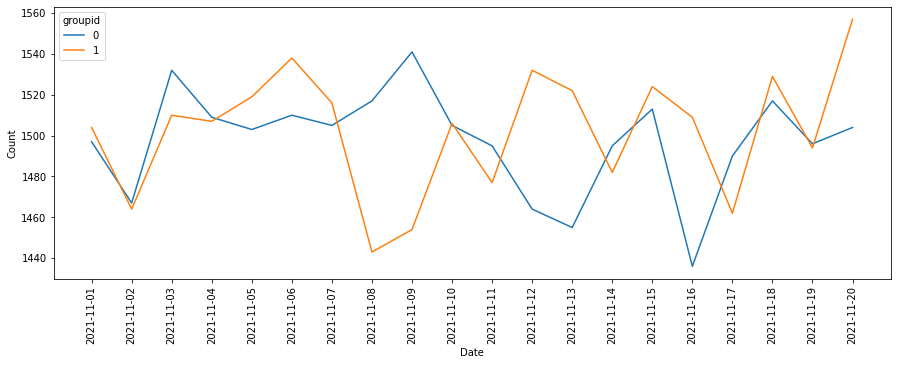

In [157]:
## Group id 0 and 1 effect /difference
plt.figure(figsize=(15,5))
sns.lineplot(x='dt',y='ts',data=data_count,hue='groupid')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Pretest data

In [77]:
pre_test=pd.read_csv("/home/sakshi/Documents/Activity_all.csv")

In [78]:
pre_test.head()

,userid,dt,groupid,activity_level
0,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-10-01,0,0
1,d2646662-269f-49de-aab1-8776afced9a3,2021-10-01,0,0
2,c4d1cfa8-283d-49ad-a894-90aedc39c798,2021-10-01,1,0
3,6889f87f-5356-4904-a35a-6ea5020011db,2021-10-01,0,0
4,dbee604c-474a-4c9d-b013-508e5a0e3059,2021-10-01,1,0


In [80]:
pre_test.groupby('dt').count()

,userid,groupid,activity_level
dt,,,
2021-10-01,60000,60000,60000
2021-10-02,60000,60000,60000
2021-10-03,60000,60000,60000
2021-10-04,60000,60000,60000
2021-10-05,60000,60000,60000
...,...,...,...
2021-11-26,60000,60000,60000
2021-11-27,60000,60000,60000
2021-11-28,60000,60000,60000


In [81]:
pre_test.describe()

,groupid,activity_level
count,3.660000e+06,3.660000e+06
mean,5.008167e-01,6.452988e+00
std,4.999994e-01,6.672417e+00
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,1.000000e+00,4.000000e+00
75%,1.000000e+00,1.200000e+01
max,1.000000e+00,2.000000e+01


In [83]:
## Datewise , groupwise count of activity level
pre_test.groupby(['dt','groupid','activity_level']).count()

userid
dt         groupid activity_level        
2021-10-01 0       0                14614
                   1                  792
                   2                  755
                   3                  799
                   4                  800
...                                   ...
2021-11-30 1       16                1489
                   17                1494
                   18                1466
                   19                1494
                   20                 750

[2562 rows x 1 columns]

In [86]:
pre_count=pre_test.query('activity_level>0').groupby(['dt','groupid']).count().reset_index()

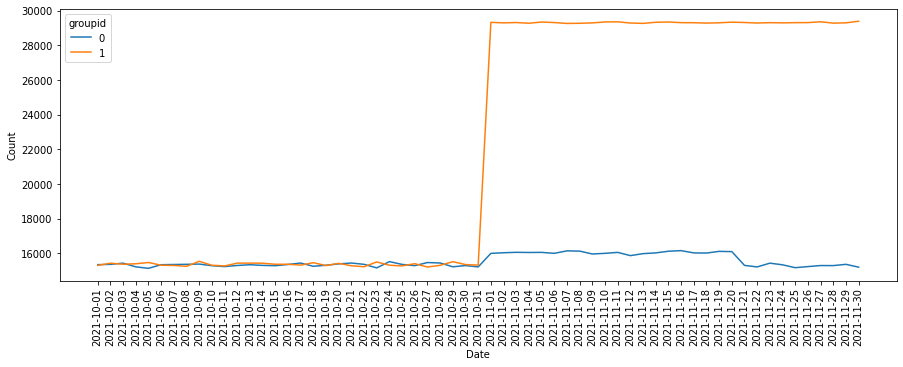

In [87]:
#checking for the impact in control and test group of activity level
plt.figure(figsize=(15,5))
sns.lineplot(x='dt',y='userid',data=pre_count,hue='groupid')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Comparing activity between groups

In [88]:
pre_test.head()

,userid,dt,groupid,activity_level
0,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-10-01,0,0
1,d2646662-269f-49de-aab1-8776afced9a3,2021-10-01,0,0
2,c4d1cfa8-283d-49ad-a894-90aedc39c798,2021-10-01,1,0
3,6889f87f-5356-4904-a35a-6ea5020011db,2021-10-01,0,0
4,dbee604c-474a-4c9d-b013-508e5a0e3059,2021-10-01,1,0


In [101]:
pre_test.query('groupid==0').groupby(['groupid','activity_level']).count().reset_index()

,groupid,activity_level,userid,dt
0,0,0,878604,878604
1,0,1,49124,49124
2,0,2,48848,48848
3,0,3,48488,48488
4,0,4,48495,48495
5,0,5,48702,48702
6,0,6,48743,48743
7,0,7,48572,48572
8,0,8,48359,48359
9,0,9,48711,48711


In [105]:
from scipy.stats import ttest_ind

In [104]:
pre_test.query('groupid==0 and dt>="2021-11-01"')['activity_level'].to_numpy()

array([ 0,  0,  0, ..., 20, 20, 20])

In [106]:
ttest_ind(pre_test.query('groupid==0 and dt>="2021-11-01"')['activity_level'].to_numpy(),
         pre_test.query('groupid==1 and dt>="2021-11-01"')['activity_level'].to_numpy())

Ttest_indResult(statistic=-498.4000989153473, pvalue=0.0)

In [107]:
pre_count.head()

,dt,groupid,userid,activity_level
0,2021-10-01,0,15337,15337
1,2021-10-01,1,15297,15297
2,2021-10-02,0,15354,15354
3,2021-10-02,1,15421,15421
4,2021-10-03,0,15423,15423


In [124]:
before=pre_test.query('activity_level>0 and dt<"2021-11-01"').groupby(['groupid','dt']).count()
after=pre_test.query('activity_level>0 and dt>="2021-11-01"').groupby(['groupid','dt']).count()

In [118]:
before.head()

userid  activity_level
groupid dt                                
0       2021-10-01   15337           15337
        2021-10-02   15354           15354
        2021-10-03   15423           15423
        2021-10-04   15211           15211
        2021-10-05   15126           15126

In [121]:
ttest_ind(before.query('groupid==0')['userid'].to_numpy(),before.query('groupid==1')['userid'].to_numpy())

Ttest_indResult(statistic=-1.4121065242323187, pvalue=0.1630842353828083)

In [122]:
statistics.mean(before.query('groupid==0')['userid'])

15320.870967741936

In [123]:
statistics.mean(before.query('groupid==1')['userid'])

15352.516129032258

In [125]:
statistics.mean(after.query('groupid==0')['userid'])

15782

In [126]:
statistics.mean(after.query('groupid==1')['userid'])

29302.433333333334

In [127]:
ttest_ind(after.query('groupid==0')['userid'].to_numpy(),after.query('groupid==1')['userid'].to_numpy())

Ttest_indResult(statistic=-198.89904948926164, pvalue=6.590603584107244e-84)

### CTR

In [128]:
ctr=pd.read_csv("/home/sakshi/Documents/Ctr_all.csv")

In [129]:
ctr.head()

,userid,dt,groupid,ctr
0,60389fa7-2d71-4cdf-831c-c2bb277ffa1e,2021-11-13,0,31.81
1,b59cb225-d160-4851-92d2-7cc8120a2f63,2021-11-13,0,30.46
2,aa336050-934e-453f-a5b0-dd881fcd114e,2021-11-13,0,34.25
3,8df767f4-a10f-4322-a722-676b7e02b372,2021-11-13,0,34.92
4,a74762ed-4da0-42ab-91d2-40d7e808dfe9,2021-11-13,0,34.95


In [130]:
ctr.dt.value_counts()

2021-11-15    45449
2021-11-16    45447
2021-11-20    45419
2021-11-19    45396
2021-11-11    45394
              ...  
2021-10-19    30587
2021-10-10    30581
2021-10-22    30573
2021-10-31    30519
2021-10-11    30489
Name: dt, Length: 61, dtype: int64

In [134]:
ctr.query('groupid==0 and dt>="2021-11-01"').groupby('groupid').mean()

,ctr
groupid,
0,32.996978


In [135]:
ctr.query('groupid==0 and dt<"2021-11-01"').groupby('groupid').mean()

,ctr
groupid,
0,33.000913


In [136]:
ctr.query('groupid==1 and dt>="2021-11-01"').groupby('groupid').mean()

,ctr
groupid,
1,37.996959


In [137]:
ctr.query('groupid==1 and dt<"2021-11-01"').groupby('groupid').mean()

,ctr
groupid,
1,32.999572


In [141]:
ctr_group_count=ctr.groupby(['groupid','dt']).mean().reset_index()

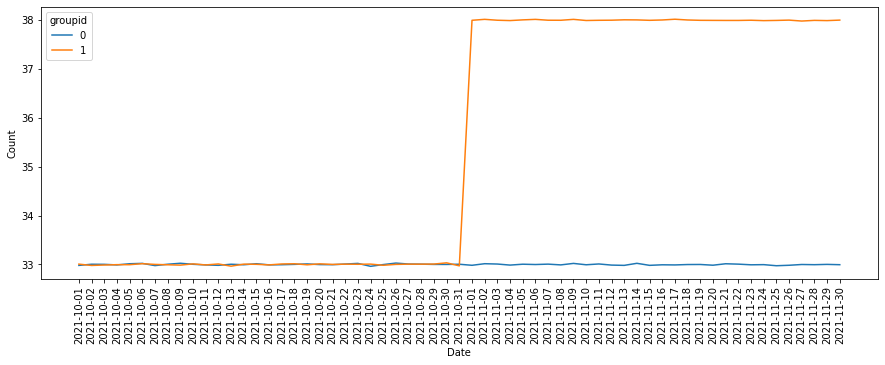

In [143]:
plt.figure(figsize=(15,5))
sns.lineplot(x='dt',y='ctr',data=ctr_group_count,hue='groupid')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [154]:
before=ctr.query('dt<"2021-11-01"')[['groupid','ctr']]
after=ctr.query('dt>="2021-11-01"')[['groupid','ctr']]

In [155]:
ttest_ind(before.query('groupid==0')['ctr'].to_numpy(),before.query('groupid==1')['ctr'].to_numpy())

Ttest_indResult(statistic=0.3775817380268586, pvalue=0.705741417344299)

In [156]:
ttest_ind(after.query('groupid==0')['ctr'].to_numpy(),after.query('groupid==1')['ctr'].to_numpy())

Ttest_indResult(statistic=-1600.7913068017688, pvalue=0.0)